In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df=pd.read_csv('/content/Walmart DataSet.csv')
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [94]:
#converting Date column to date-time format
df['Date']=pd.to_datetime(df['Date'],format="%d-%m-%Y")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [95]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [96]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

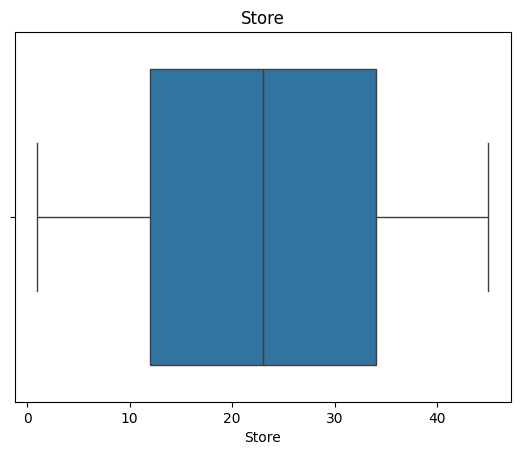

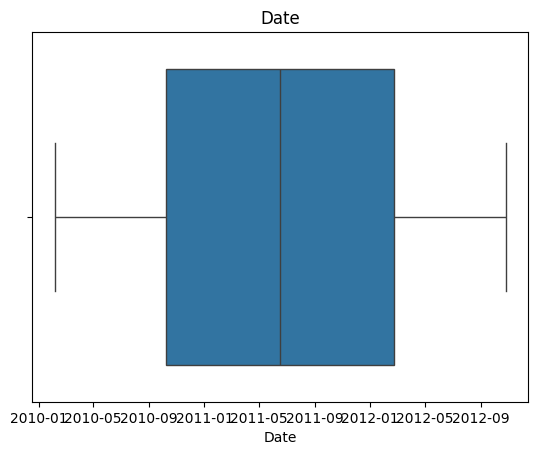

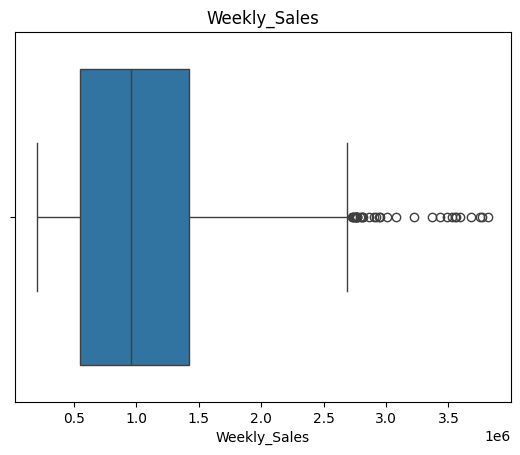

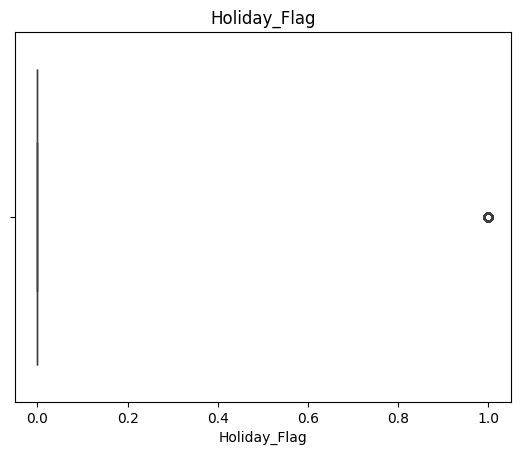

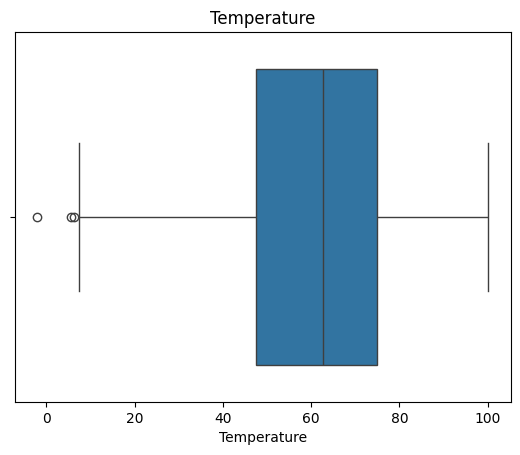

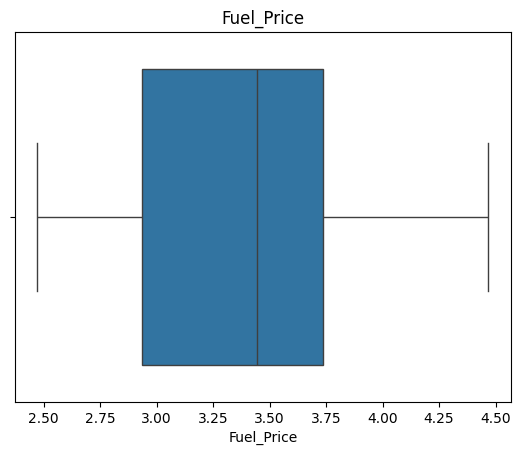

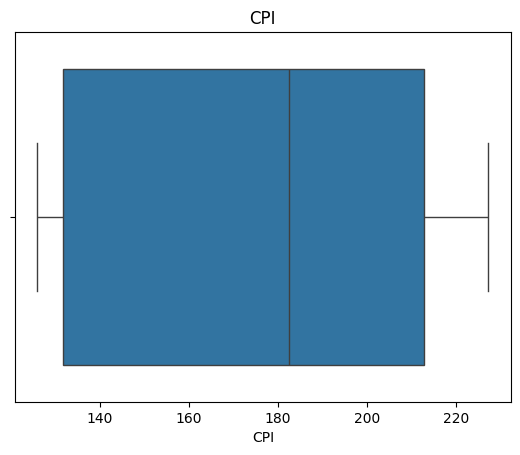

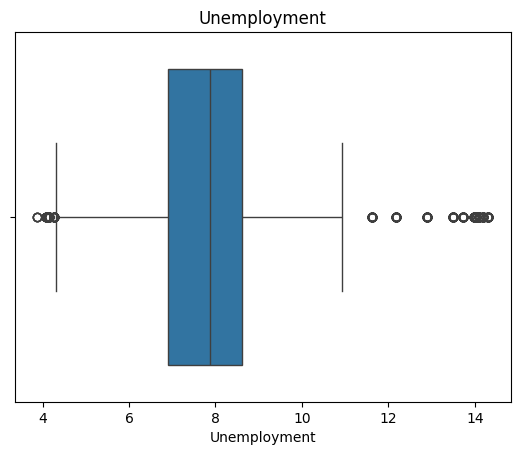

In [97]:
#Checking outliers
for col in df.columns:
  if df[col].dtype!='object':
    sns.boxplot(data=df,x=col)
    plt.title(col)
    plt.show()

**FROM THE ABOVE BOXPLOTS WE FOUND THAT THERE ARE OUTLIERS IN WEEKLY_SALES AND UNEMPLOYMENT COLUMNS.NOW WE WILL BE HANDLING THE OUTLIERS AND THEN WE WILL CONTINUE TO FURTHER STEPS**

In [98]:
df_handled=df.copy()
out_list=['Weekly_Sales','Unemployment']
for col in out_list:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  LL=q1-(1.5*iqr)
  UL=q3+(1.5*iqr)
  median_of_data=np.median(df_handled[col])
  df_handled[col]=np.where((df_handled[col] < LL) | (df_handled[col]> UL),median_of_data,df_handled[col])



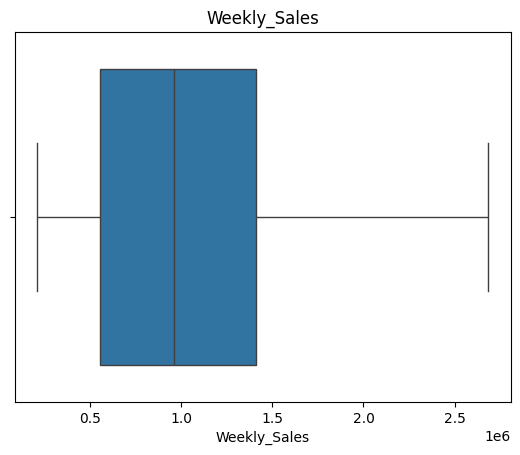

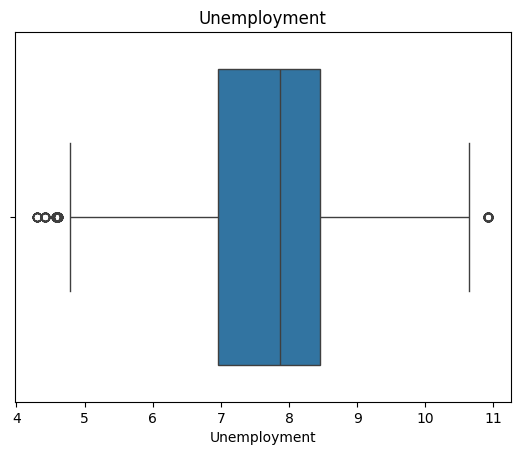

In [99]:
out_list=['Weekly_Sales','Unemployment']
for col in out_list:
  sns.boxplot(data=df_handled,x=col)
  plt.title(col)
  plt.show()


In [100]:
#Handling outliers with z-score:
df_handled2=df.copy()
def handle_outliers(df,col,threshold=3):
  z_scores=np.abs((df[col]-df[col].mean())/ df[col].std())
  outliers_group=z_scores > threshold
  df_handled2.loc[outliers_group,col]=df[col].median()
  return df_handled2

df_handled2=handle_outliers(df,'Weekly_Sales')
df_handled2=handle_outliers(df,'Unemployment')



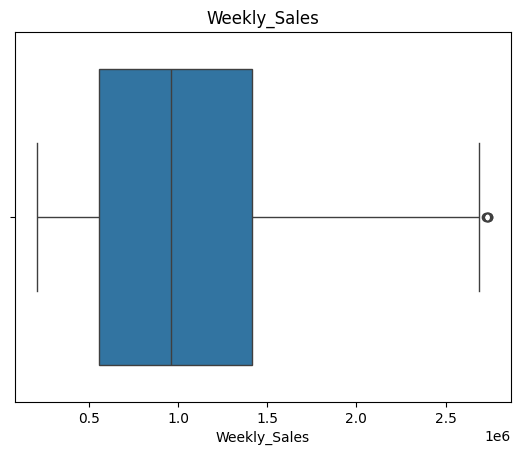

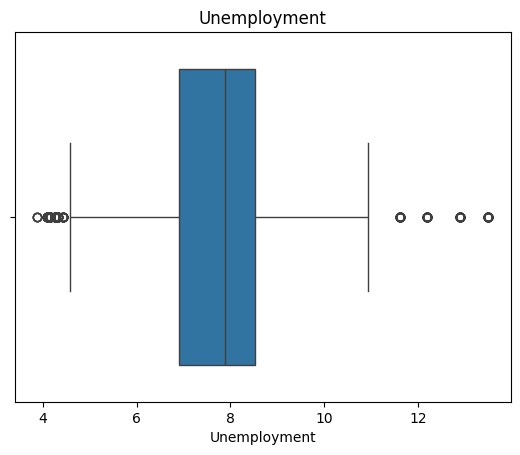

In [101]:
out_list=['Weekly_Sales','Unemployment']
for col in out_list:
  sns.boxplot(data=df_handled2,x=col)
  plt.title(col)
  plt.show()

 **Visualization of  the outliers with the help of Boxplots has been done  and then handled them by filling with median of the column.Outliers are handled by using both IQR based approach and also by using Z-scores approach.The handled data has been stored in a separate dataframe so that the originality of the data won't be disturbed in case of the original data is needed.**

                     Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store         1.000000e+00     -0.331487 -4.386841e-16    -0.022659   
Weekly_Sales -3.314868e-01      1.000000  2.455618e-02    -0.043344   
Holiday_Flag -4.386841e-16      0.024556  1.000000e+00    -0.155091   
Temperature  -2.265908e-02     -0.043344 -1.550913e-01     1.000000   
Fuel_Price    6.002295e-02      0.018476 -7.834652e-02     0.144982   
CPI          -2.094919e-01     -0.069211 -2.162091e-03     0.176888   
Unemployment  3.021544e-01     -0.071529  9.263661e-03     0.027644   

              Fuel_Price       CPI  Unemployment  
Store           0.060023 -0.209492      0.302154  
Weekly_Sales    0.018476 -0.069211     -0.071529  
Holiday_Flag   -0.078347 -0.002162      0.009264  
Temperature     0.144982  0.176888      0.027644  
Fuel_Price      1.000000 -0.170642     -0.094909  
CPI            -0.170642  1.000000     -0.216201  
Unemployment   -0.094909 -0.216201      1.000000  


<Axes: >

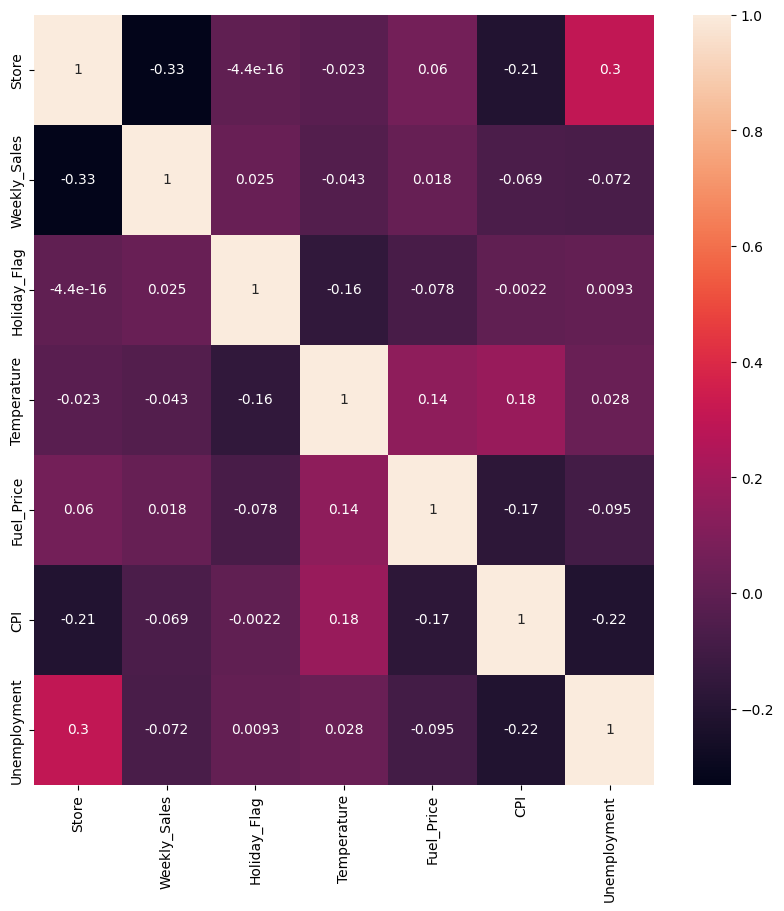

In [102]:
#Corelation analysis:
df_corr=df_handled.corr(numeric_only=True)
print(df_corr)
plt.figure(figsize=(10,10))
sns.heatmap(df_corr,annot=True)

**Based on the Heat Map and also the correlation data of the dataframe,The relationship between different attributes has been studied**

**a)If weekly_sales are effected by unemployment rate , if yes ,Which stores are suffering**

    Store       level_1  Unemployment
0       1  Weekly_Sales     -0.097955
1       2  Weekly_Sales      0.025963
2       3  Weekly_Sales     -0.230413
3       4  Weekly_Sales     -0.220181
4       5  Weekly_Sales     -0.207043
5       6  Weekly_Sales     -0.000020
6       7  Weekly_Sales     -0.165382
7       8  Weekly_Sales     -0.052580
8       9  Weekly_Sales     -0.191534
9      10  Weekly_Sales      0.099528
10     11  Weekly_Sales     -0.020339
11     12  Weekly_Sales     -0.118419
12     13  Weekly_Sales     -0.229574
13     14  Weekly_Sales      0.200388
14     15  Weekly_Sales      0.078905
15     16  Weekly_Sales     -0.070864
16     17  Weekly_Sales     -0.263600
17     18  Weekly_Sales      0.139179
18     19  Weekly_Sales      0.101464
19     20  Weekly_Sales     -0.019677
20     21  Weekly_Sales      0.218367
21     22  Weekly_Sales      0.039043
22     23  Weekly_Sales     -0.090004
23     24  Weekly_Sales     -0.012261
24     25  Weekly_Sales     -0.004958
25     26  W

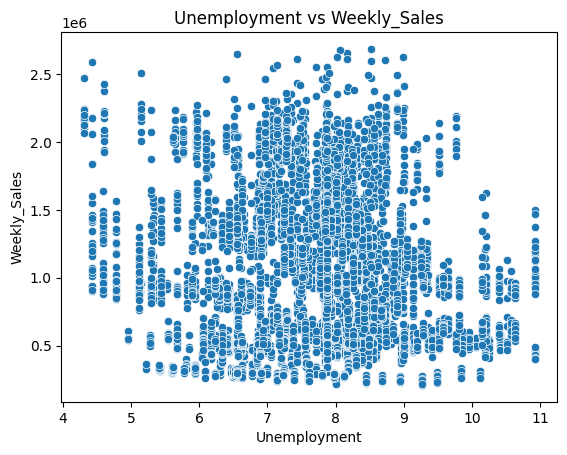

Stores ID effected :
 36
44


In [103]:
correlation_unemployment=df_handled.groupby('Store')[['Weekly_Sales','Unemployment']].corr().iloc[0::2,-1].reset_index()
print(correlation_unemployment)
sns.scatterplot(data=df_handled,x='Unemployment',y='Weekly_Sales')
plt.title('Unemployment vs Weekly_Sales')
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.show()
a=correlation_unemployment[correlation_unemployment['Unemployment'].abs()>0.5]
print('Stores ID effected :\n',a['Store'].to_string(index=False))




**Based on the correlation values and the scatter plot, The weekly sales are effected by Unemploment rate and taking the threshold as 0.5, The stores which effected are 36 and 44.**

**b)If weekly sales show a seasonal trend ,when and what could be the reason ?**

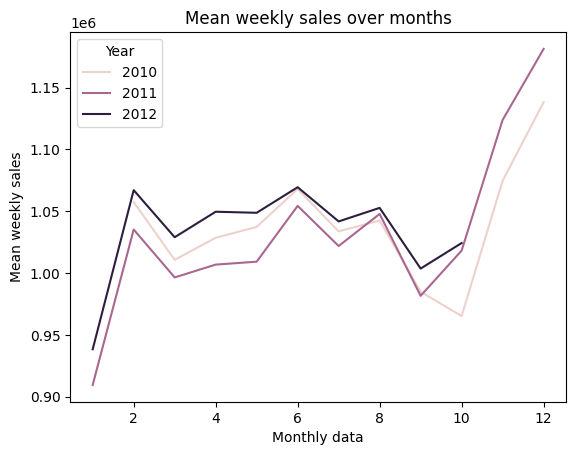

In [177]:
df_handled['Date']=pd.to_datetime(df['Date'])
df_handled['Month']=df_handled['Date'].dt.month
df_handled['Year']=df_handled['Date'].dt.year
sns.lineplot(data=df_handled,x='Month',y='Weekly_Sales',hue='Year',errorbar=None)
plt.title('Mean weekly sales over months')
plt.xlabel('Monthly data')
plt.ylabel('Mean weekly sales')
plt.savefig(r'mean weekly sales over months')
plt.show()

**Based on the above graph, We can observe that there has been a sudden increase in the Mean Weekly Sales from the Month of October to Month of December in the years 2010,2011 and also in 2012.As December month could be the  most possible  holiday month on the ocassion of Festival there could have been an sudden increase in the market sales.**

**c)Does temperature affect the weekly sales in any manner ?**

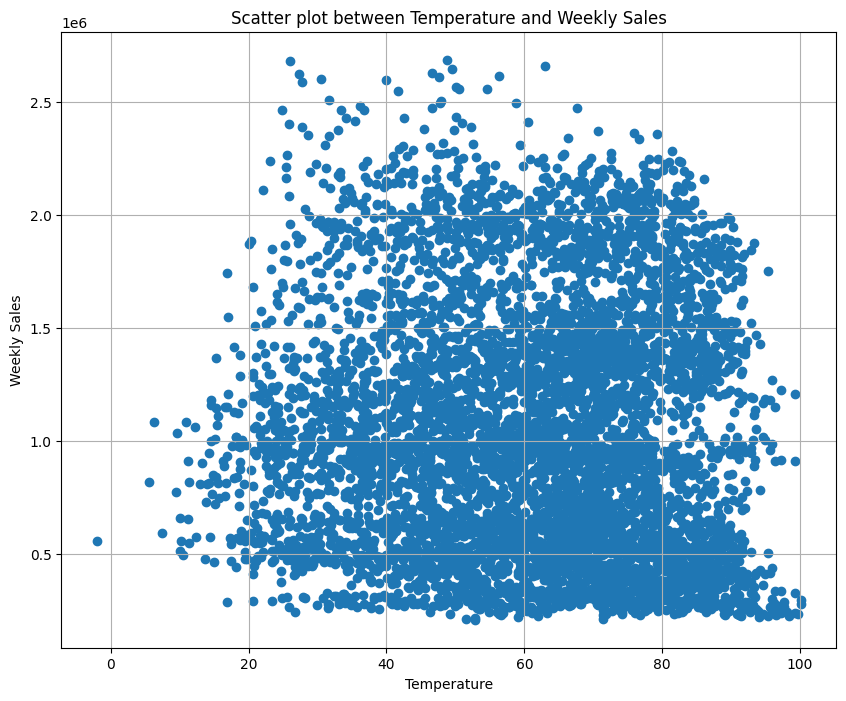

<Figure size 640x480 with 0 Axes>

In [180]:
plt.figure(figsize=(10,8))
plt.scatter(df_handled['Temperature'],df_handled['Weekly_Sales'])
plt.title('Scatter plot between Temperature and Weekly Sales')
plt.grid(True)
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()
plt.savefig(r'Scatter plot between Temperature and Weekly Sales')


**Based on the above graph we can observe that the distribution of weekly sales is more when the temperature is between 40 and 80 fahrenheit.From this we can say that low temperatures i.e less than 40 fahrenheit and high temperatures i.e more than 80 fahrenheit are not ideal for better weekly sales.**

**d)How is the consumer price affecting weekly sales of various stores**

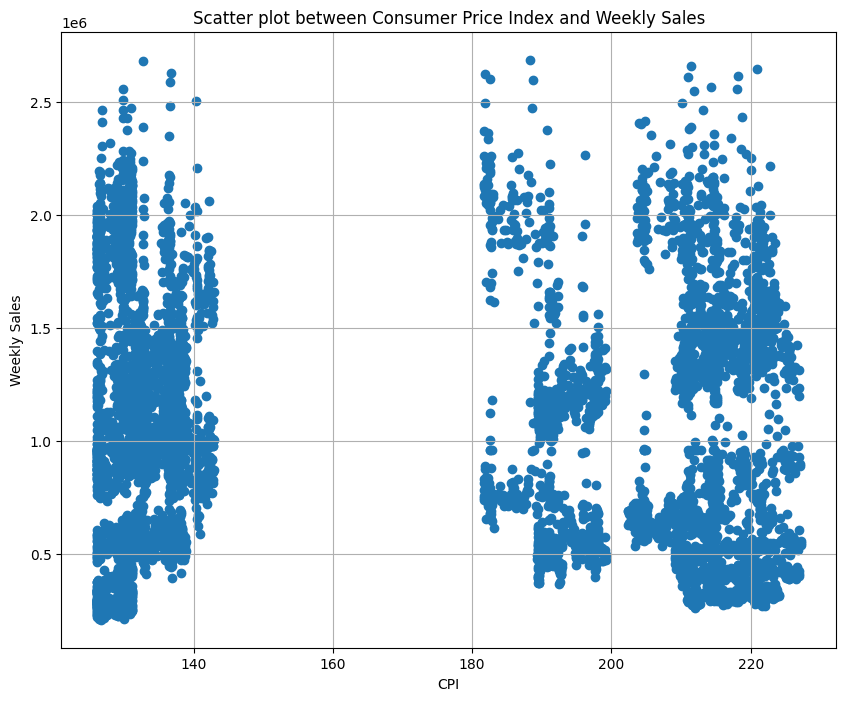

<Figure size 640x480 with 0 Axes>

In [178]:
plt.figure(figsize=(10,8))
plt.scatter(df_handled['CPI'],df_handled['Weekly_Sales'])
plt.title('Scatter plot between Consumer Price Index and Weekly Sales')
plt.grid(True)
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.show()
plt.savefig(r'Scatter plot between Consumer Price Index and Weekly Sales')

**Based on the graph we can say that there is no relationship between Consumer Price Index and Weekly Sales as the distribution of data of weekly sales has been clustered into three groups.**

**e)Top performing stores according to the historical data**

In [107]:
top_performing_stores=df_handled.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head()
print('The top five performing stores are : \n',top_performing_stores)

The top five performing stores are : 
 Store
4     2.867997e+08
20    2.867490e+08
14    2.799706e+08
13    2.739669e+08
2     2.706436e+08
Name: Weekly_Sales, dtype: float64


**f)The worst performing store and the differenece between the top performing store and the worst performing store**

In [108]:
worst_performing_store=df_handled.groupby('Store')['Weekly_Sales'].sum().idxmin()
print('The Worst Performing Store:',worst_performing_store)
top_store_value=df_handled.groupby('Store')['Weekly_Sales'].sum().max()
bottom_store_value=df_handled.groupby('Store')['Weekly_Sales'].sum().min()
performance_difference=top_store_value-bottom_store_value
print('The difference between top store and bottom store: ',performance_difference)

The Worst Performing Store: 33
The difference between top store and bottom store:  249639479.20000002


**TIME SERIES ANALYSIS:**

In [109]:
df_handled.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010


In [110]:
data=df_handled.copy()

In [111]:
data.set_index('Date', inplace=True)

store4 = data[data.Store == 4]

sales4 = pd.DataFrame(store4.Weekly_Sales.groupby(store4.index).sum())
print(sales4.head(20))

sales4.reset_index(inplace = True)

sales4['Date'] = pd.to_datetime(sales4['Date'])

sales4.set_index('Date',inplace = True)
print(sales4.head())

            Weekly_Sales
Date                    
2010-02-05    2135143.87
2010-02-12    2188307.39
2010-02-19    2049860.26
2010-02-26    1925728.84
2010-03-05    1971057.44
2010-03-12    1894324.09
2010-03-19    1897429.36
2010-03-26    1762539.30
2010-04-02    1979247.12
2010-04-09    1818452.72
2010-04-16    1851519.69
2010-04-23    1802677.90
2010-04-30    1817273.28
2010-05-07    2000626.14
2010-05-14    1875597.28
2010-05-21    1903752.60
2010-05-28    1857533.70
2010-06-04    1903290.58
2010-06-11    1870619.23
2010-06-18    1929736.35
            Weekly_Sales
Date                    
2010-02-05    2135143.87
2010-02-12    2188307.39
2010-02-19    2049860.26
2010-02-26    1925728.84
2010-03-05    1971057.44


In [112]:
sales4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [113]:
sales4_1=sales4.copy()

<Axes: xlabel='Date'>

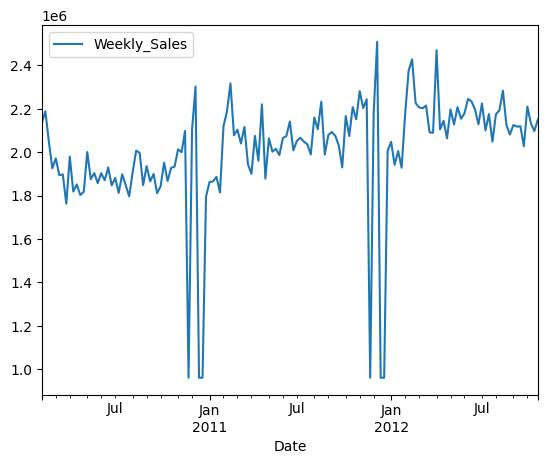

In [114]:
sales4_1.plot()

**Performing ADFULLER test to check the Stationary of data and handling the Non-Stationary data to make it Stationary**

In [115]:
from statsmodels.tsa.stattools import adfuller

In [116]:
result=adfuller(sales4_1['Weekly_Sales'])
p_value=result[1]
print(p_value)
if p_value < 0.05:
  print('we accept null hypothesis and the data is stationary')
else:
  print('We reject null hypothesis and data is not stationary')

0.3854850450323299
We reject null hypothesis and data is not stationary


In [117]:
rolling_mean=sales4_1.rolling(window=6).mean()
rolling_mean_detrended=sales4_1-rolling_mean

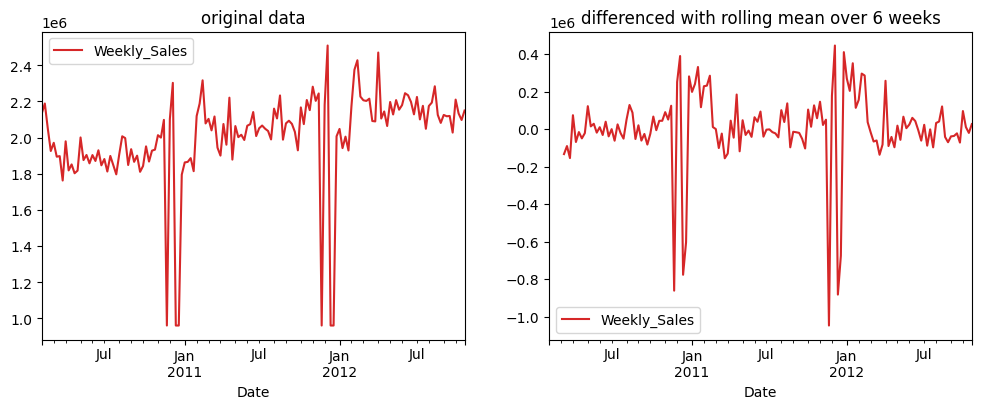

In [118]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended.plot(figsize=(12,4),color='tab:red',
                            title='differenced with rolling mean over 6 weeks',
                            ax=ax1)

ax2=plt.subplot(1,2,1)
sales4_1.plot(figsize=(12,4),
          color='tab:red',
          title="original data",
          ax=ax2)

plt.show()

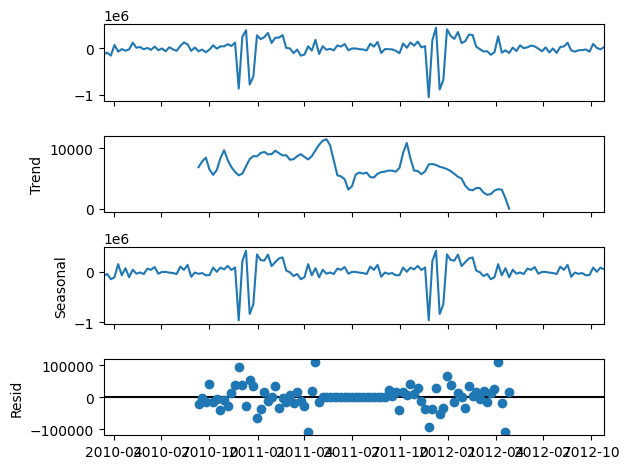

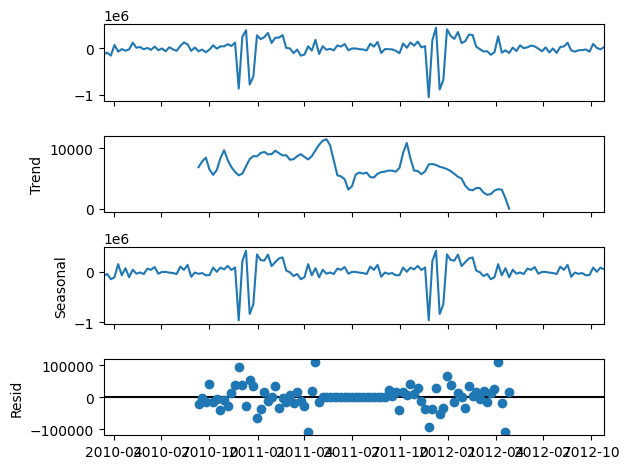

In [119]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_plot=seasonal_decompose(rolling_mean_detrended.dropna())
decomposition_plot.plot()

In [120]:
rolling_mean_detrended_diff=rolling_mean_detrended-rolling_mean_detrended.shift()

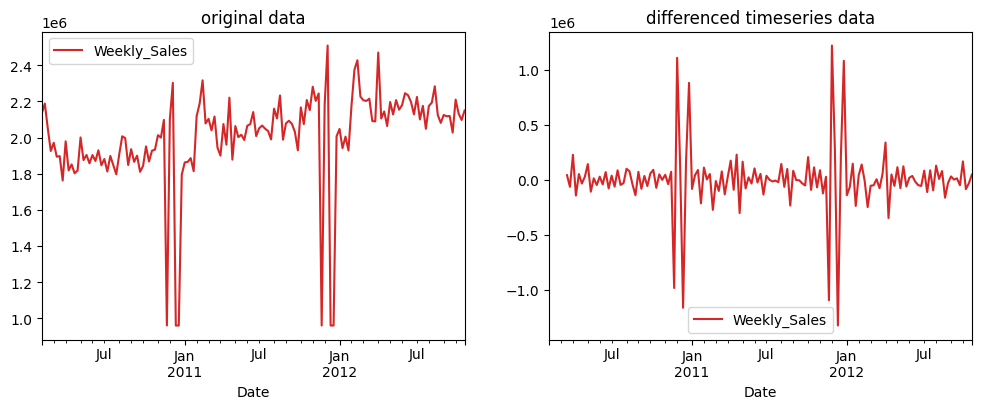

In [121]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrended_diff.plot(figsize=(12,4),color='tab:red',
                            title='differenced timeseries data',
                            ax=ax1)

ax2=plt.subplot(1,2,1)
sales4_1.plot(figsize=(12,4),
          color='tab:red',
          title="original data",
          ax=ax2)

plt.show()

In [122]:
rolling_mean_detrended_diff=rolling_mean_detrended_diff.dropna()

In [123]:
result=adfuller(rolling_mean_detrended_diff['Weekly_Sales'])
pvalue=result[1]


In [124]:
print(pvalue)

3.155743228990536e-10


In [125]:
if pvalue<0.05:
  print('we accept null hypothesis- data is stationary')

else:
  print('we reject null hypothesis - data is not stationary')

we accept null hypothesis- data is stationary


**We have performed the Seasonal decomposition of data and observed trends and seasonalty in the data.The data has been made stationary with the help of differencing of data and other necessary shifts in the data.**

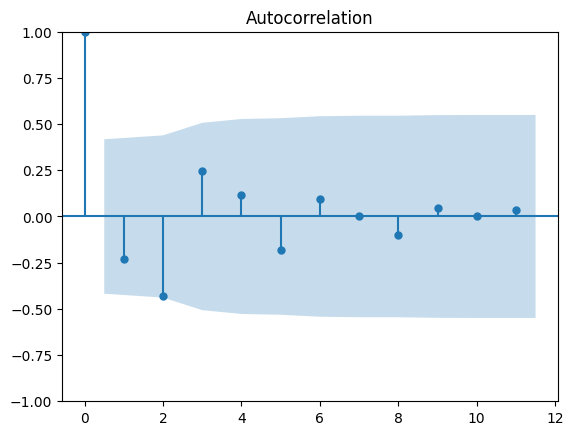

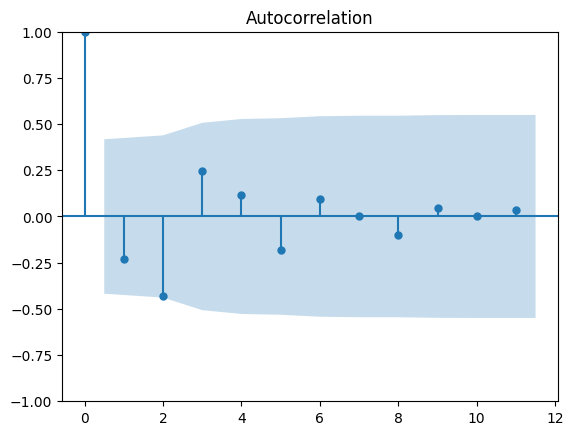

In [126]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf_plot=acf(rolling_mean_detrended_diff.dropna()) #most recent positive value before getting -ve
plot_acf(acf_plot)

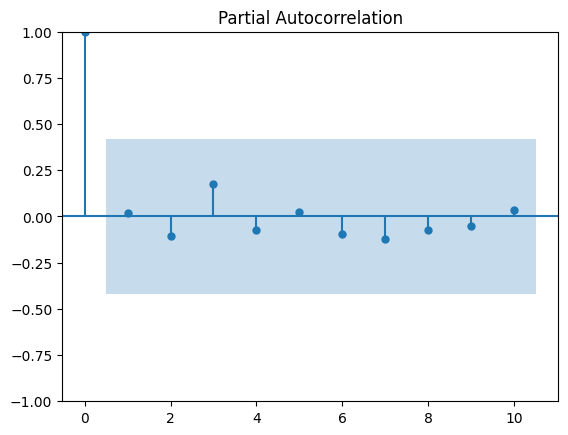

In [127]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf_plot=pacf(rolling_mean_detrended.dropna()) #th data point or lag where there is a sudden shut-off - 2
plot_pacf(pacf_plot, lags=10);

**Performing ARIMA model with suitable order from the above ACF and PACF plots to fit the data and evaluating the same with the help of testing data.**

In [128]:
from statsmodels.tsa.arima.model import ARIMA
train=rolling_mean_detrended_diff.iloc[:105]['Weekly_Sales']
test=rolling_mean_detrended_diff.iloc[105:]['Weekly_Sales']

In [129]:
model=ARIMA(train,order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [130]:
rolling_mean_detrended_diff['predict']=model_fit.predict(start=len(train),
                                                         end=len(train)+len(test)-1,dynamic=True)

<ipython-input-130-116b50dcef6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict']=model_fit.predict(start=len(train),


<Axes: xlabel='Date'>

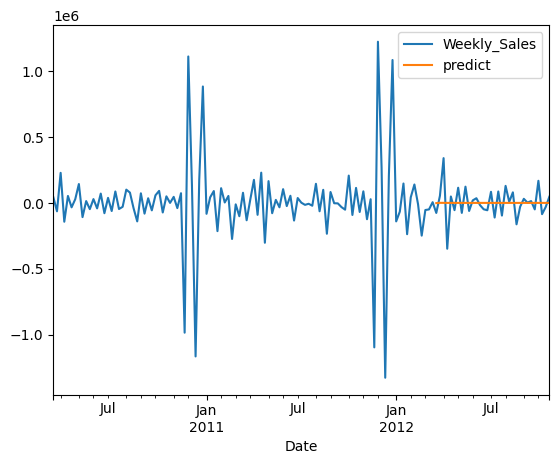

In [131]:
rolling_mean_detrended_diff[['Weekly_Sales','predict']].plot()



In [132]:
!pip install pmdarima
from pmdarima import auto_arima
order=auto_arima(rolling_mean_detrended_diff['Weekly_Sales'])
order.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  137
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1868.670
Date:                Thu, 30 May 2024   AIC                           3749.340
Time:                        05:46:27   BIC                           3766.860
Sample:                    03-19-2010   HQIC                          3756.460
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1246.5905   1389.563      0.897      0.370   -1476.903    3970.084
ar.L1          0.1588      0.081      1.959      0.050   -5.46e-05       0.318
ar.L2         -0.3066      0.102     -3.007      0.003      -0.507      -0.107
ar.L3          0.2699      0.074      3.656      0.000       0.125       0.415
ma.L1         -0.9632      0.055    -17.463      0.000      -1.071      -0.855
sigma2      4.646e+10      0.000   9.84e+13      0.000    4.65e+10    4.65e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               627.33
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.73   Skew:                            -2.01
Prob(H) (two-sided):                  0.28   Kurtosis:                        12.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.32e+28. Standard errors may be unstable.
"""

In [133]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(3,0,1),seasonal_order=(1,1,1,52)) # every 52 weeks pattern is repeating
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [134]:
rolling_mean_detrended_diff['predict']=model.predict(start=len(train),
                                                         end=len(train)+len(test)-1,dynamic=True)

<ipython-input-134-238c7348ce2b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rolling_mean_detrended_diff['predict']=model.predict(start=len(train),


<Axes: xlabel='Date'>

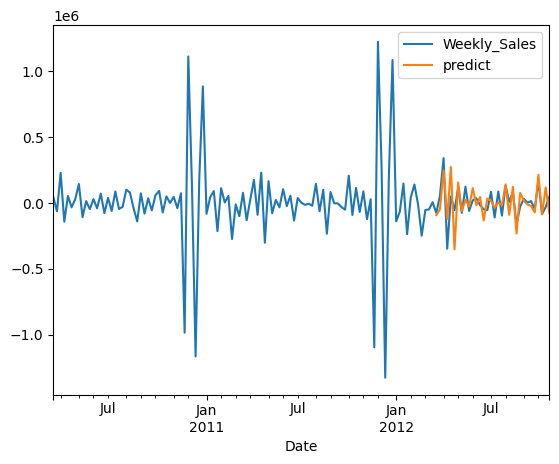

In [135]:
rolling_mean_detrended_diff[['Weekly_Sales','predict']].plot()

**As there has been seasonality in the data,we have used SARIMAX model to fit the data and have obatined the above graphs where there has been a close relationship to the actual and predicted ones.**

<Axes: xlabel='Date'>

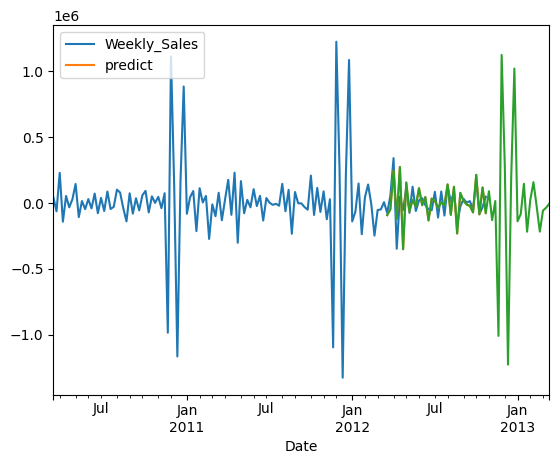

In [136]:
forecast = model.forecast(steps=52)
rolling_mean_detrended_diff.plot()
forecast.plot()

**I have performed Time Series Analysis and Forecasting for the store number 4.As the trends and patterns for each store may vary, we will be carrying out analysis and Forecasting using the same procedure for any other two stores ****
**

**Implementing Time Series Analysis and Forecasting on Store no:5**

In [137]:
store5 = data[data.Store == 5]
sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.reset_index(inplace = True)
sales5['Date'] = pd.to_datetime(sales5['Date'])
sales5.set_index('Date',inplace = True)
print(sales5.head())

            Weekly_Sales
Date                    
2010-02-05     317173.10
2010-02-12     311825.70
2010-02-19     303447.57
2010-02-26     270281.63
2010-03-05     288855.71


In [138]:
sales5.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [139]:
sales5_1=sales5.copy()

<Axes: xlabel='Date'>

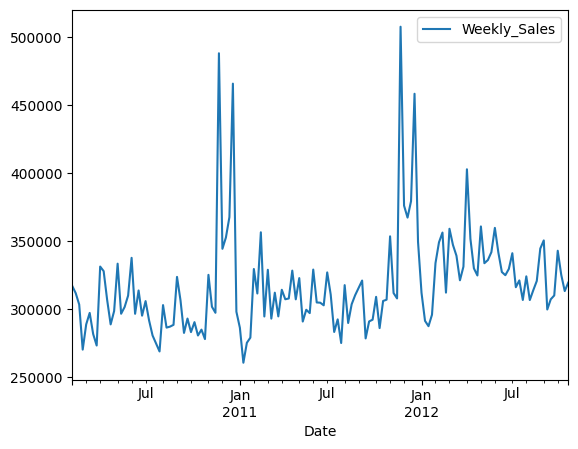

In [140]:
sales5_1.plot()

In [141]:
result=adfuller(sales5_1['Weekly_Sales'])
p_value=result[1]
print(p_value)
if p_value < 0.05:
  print('we accept null hypothesis and the data is stationary')
else:
  print('We reject null hypothesis and data is not stationary')

0.00042517056141923293
we accept null hypothesis and the data is stationary


**Though the data has been stationary but there has been still some seasonality observed in the plot. So I will be performing necessary steps to make data suitable for analysis**

In [142]:
rolling_mean=sales5_1.rolling(window=6).mean()
rolling_mean_detrended5=sales5_1-rolling_mean

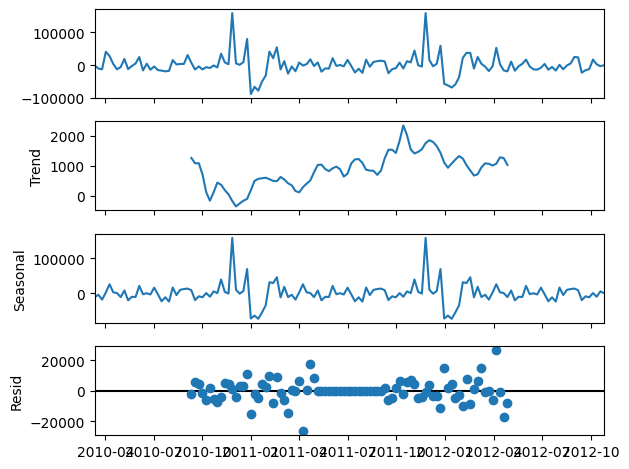

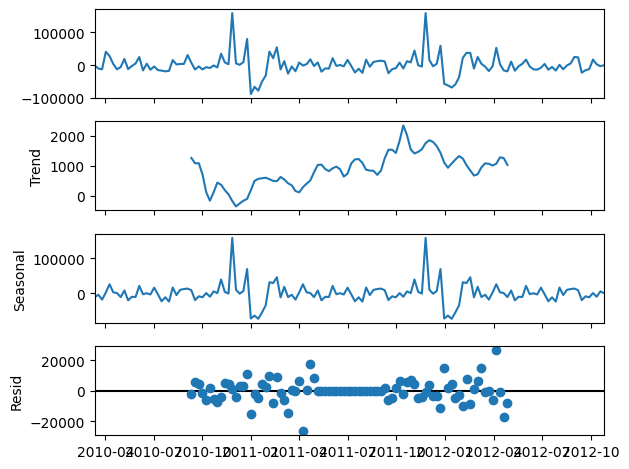

In [143]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_plot=seasonal_decompose(rolling_mean_detrended5.dropna())
decomposition_plot.plot()

In [144]:
rolling_mean_detrended5_diff=rolling_mean_detrended5-rolling_mean_detrended5.shift()

In [145]:
rolling_mean_detrended5_diff=rolling_mean_detrended5_diff.dropna()

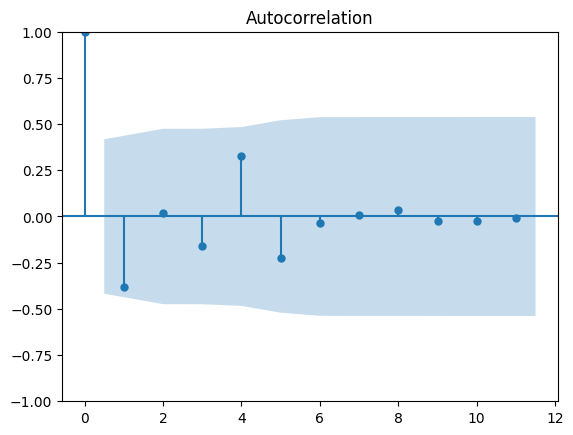

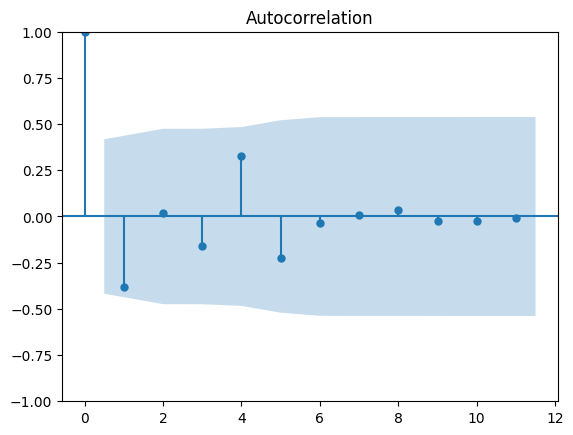

In [146]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf_plot=acf(rolling_mean_detrended5_diff.dropna()) #most recent positive value before getting -ve
plot_acf(acf_plot)

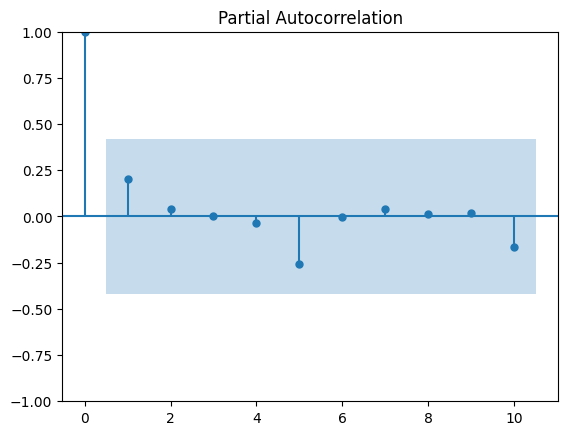

In [147]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf_plot=pacf(rolling_mean_detrended5.dropna()) #th data point or lag where there is a sudden shut-off - 2
plot_pacf(pacf_plot, lags=10);

In [148]:
from statsmodels.tsa.arima.model import ARIMA
train5=rolling_mean_detrended5_diff.iloc[:105]['Weekly_Sales']
test5=rolling_mean_detrended5_diff.iloc[105:]['Weekly_Sales']

In [149]:
model5=ARIMA(train5,order=(3,1,1))
model5_fit=model5.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [150]:
rolling_mean_detrended5_diff['predict']=model5_fit.predict(start=len(train5),
                                                         end=len(train5)+len(test5)-1,dynamic=True)

<Axes: xlabel='Date'>

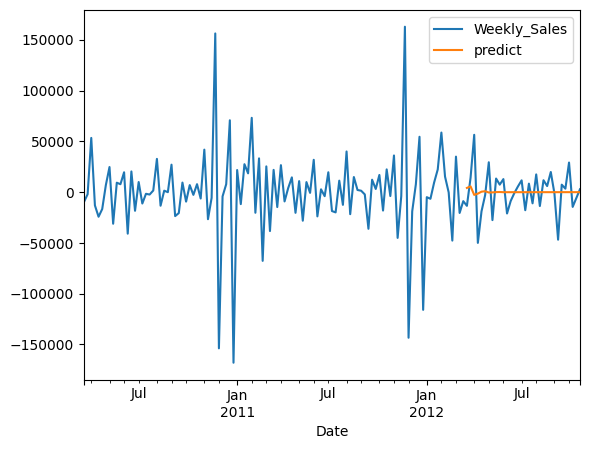

In [151]:
rolling_mean_detrended5_diff[['Weekly_Sales','predict']].plot()

In [152]:
order5=auto_arima(rolling_mean_detrended5_diff['Weekly_Sales'])
order5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  137
Model:               SARIMAX(5, 0, 2)   Log Likelihood               -1601.182
Date:                Thu, 30 May 2024   AIC                           3220.365
Time:                        05:47:43   BIC                           3246.645
Sample:                    03-19-2010   HQIC                          3231.044
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -96.0255    167.172     -0.574      0.566    -423.677     231.626
ar.L1          0.4951      0.251      1.974      0.048       0.004       0.987
ar.L2         -0.0327      0.154     -0.212      0.832      -0.335       0.269
ar.L3         -0.0447      0.103     -0.434      0.664      -0.246       0.157
ar.L4          0.1668      0.092      1.805      0.071      -0.014       0.348
ar.L5         -0.4159      0.099     -4.209      0.000      -0.610      -0.222
ma.L1         -1.2929      0.295     -4.377      0.000      -1.872      -0.714
ma.L2          0.3137      0.300      1.044      0.297      -0.275       0.903
sigma2      1.011e+09      0.000   3.56e+12      0.000    1.01e+09    1.01e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              1376.86
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.42   Skew:                             2.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.62e+27. Standard errors may be unstable.
"""

In [153]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model5=SARIMAX(train5,order=(5,0,2),seasonal_order=(3,1,1,52)) # every 52 weeks pattern is repeating
model5=model5.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few obser

In [154]:
rolling_mean_detrended5_diff['predict']=model5.predict(start=len(train5),
                                                         end=len(train5)+len(test5)-1,dynamic=True)

<Axes: xlabel='Date'>

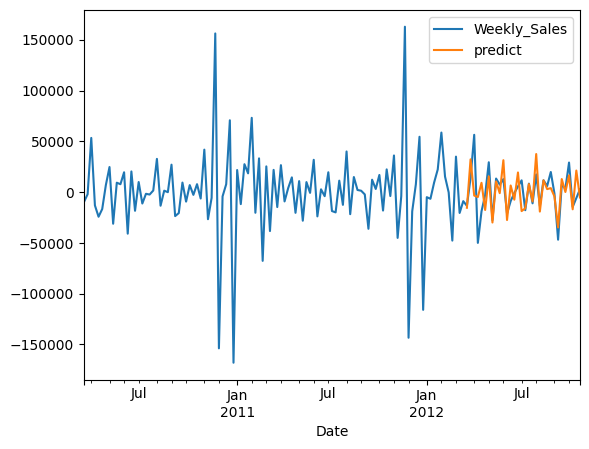

In [155]:
rolling_mean_detrended5_diff[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

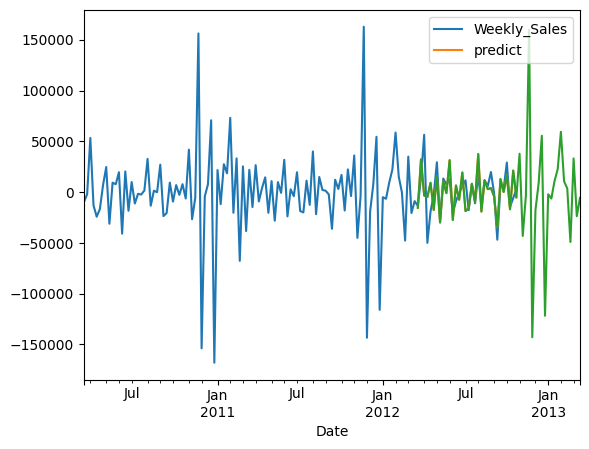

In [156]:
forecast5 = model5.forecast(steps=52)
rolling_mean_detrended5_diff.plot()
forecast5.plot()

**Performing Time Series Analysis and Forecasting on another store i.e store no.10**

In [157]:
store10 = data[data.Store == 10]
sales10 = pd.DataFrame(store10.Weekly_Sales.groupby(store10.index).sum())
sales10.reset_index(inplace = True)
sales10['Date'] = pd.to_datetime(sales10['Date'])
sales10.set_index('Date',inplace = True)
print(sales10.head())

            Weekly_Sales
Date                    
2010-02-05    2193048.75
2010-02-12    2176028.52
2010-02-19    2113432.58
2010-02-26    2006774.96
2010-03-05    1987090.09


In [158]:
sales10.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2010-02-05 to 2012-10-26
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weekly_Sales  143 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [159]:
sales10_1=sales10.copy()

<Axes: xlabel='Date'>

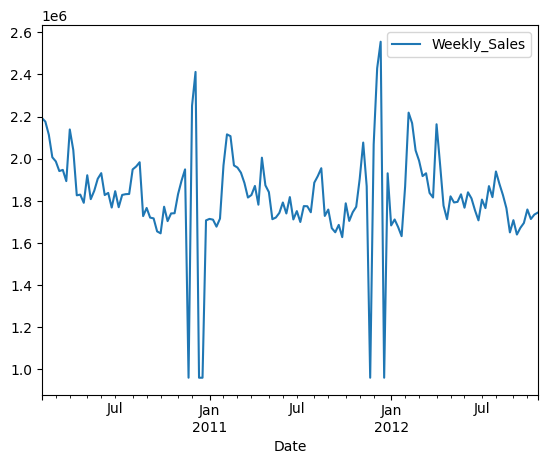

In [160]:
sales10.plot()

In [161]:
result=adfuller(sales10_1['Weekly_Sales'])
p_value=result[1]
print(p_value)
if p_value < 0.05:
  print('we accept null hypothesis and the data is stationary')
else:
  print('We reject null hypothesis and data is not stationary')

6.293387267368923e-05
we accept null hypothesis and the data is stationary


**Though the data has been stationary but there has been still some seasonality observed in the plot. So I will be performing necessary steps to make data suitable for analysis**

In [162]:
rolling_mean=sales10_1.rolling(window=6).mean()
rolling_mean_detrended10=sales10_1-rolling_mean

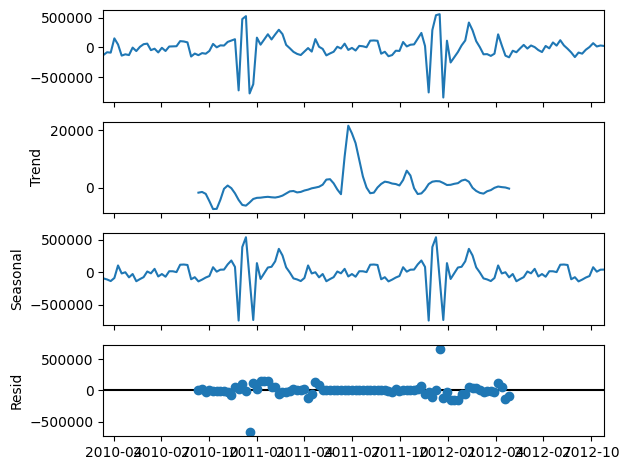

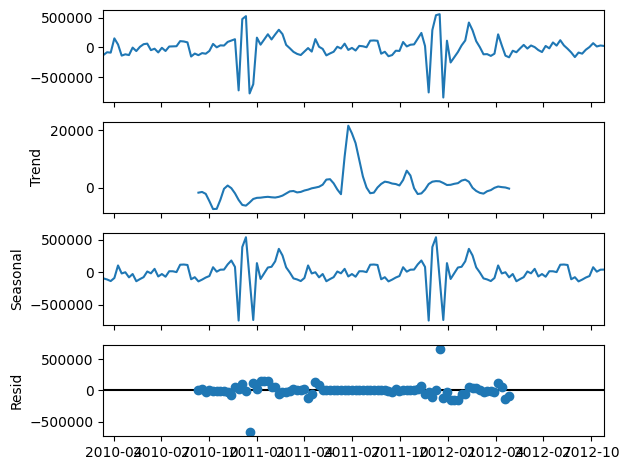

In [163]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_plot=seasonal_decompose(rolling_mean_detrended10.dropna())
decomposition_plot.plot()

In [164]:
rolling_mean_detrended10_diff=rolling_mean_detrended10-rolling_mean_detrended10.shift()

In [165]:
rolling_mean_detrended10_diff=rolling_mean_detrended10_diff.dropna()

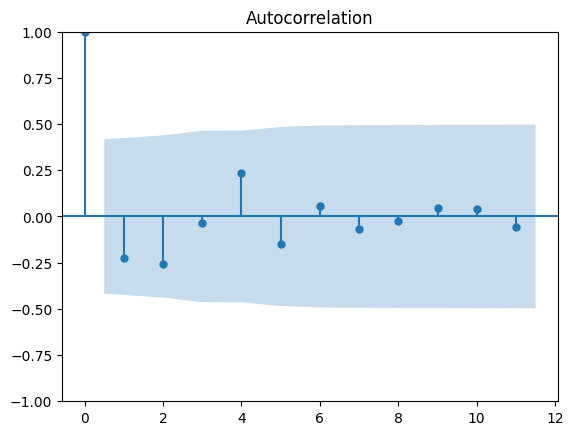

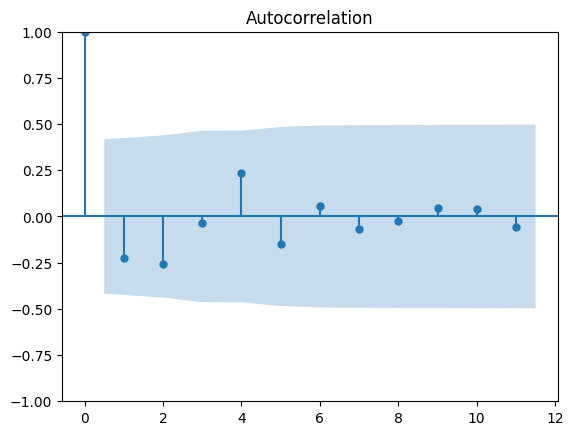

In [166]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
acf_plot=acf(rolling_mean_detrended10_diff.dropna()) #most recent positive value before getting -ve
plot_acf(acf_plot)

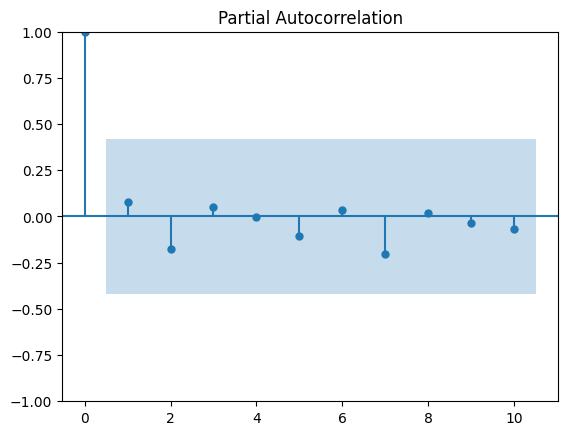

In [167]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf_plot=pacf(rolling_mean_detrended10.dropna()) #th data point or lag where there is a sudden shut-off - 2
plot_pacf(pacf_plot, lags=10);

In [168]:
from statsmodels.tsa.arima.model import ARIMA
train10=rolling_mean_detrended10_diff.iloc[:105]['Weekly_Sales']
test10=rolling_mean_detrended10_diff.iloc[105:]['Weekly_Sales']

In [169]:
model10=ARIMA(train10,order=(1,1,1))
model10_fit=model10.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [170]:
rolling_mean_detrended10_diff['predict']=model10_fit.predict(start=len(train10),
                                                         end=len(train10)+len(test10)-1,dynamic=True)

<Axes: xlabel='Date'>

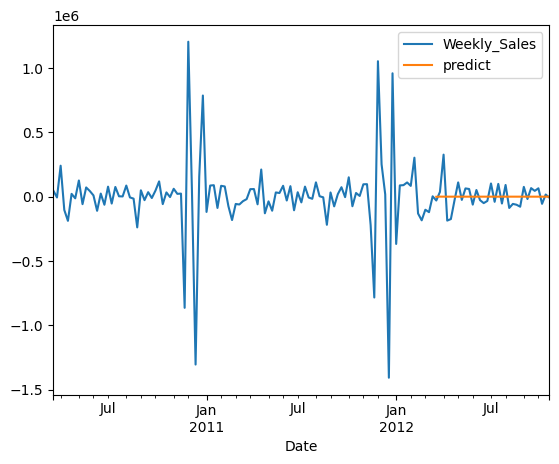

In [171]:
rolling_mean_detrended10_diff[['Weekly_Sales','predict']].plot()

In [172]:
order10=auto_arima(rolling_mean_detrended10_diff['Weekly_Sales'])
order10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  137
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1867.742
Date:                Thu, 30 May 2024   AIC                           3745.484
Time:                        05:52:32   BIC                           3760.084
Sample:                    03-19-2010   HQIC                          3751.417
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    599.5618    690.094      0.869      0.385    -752.998    1952.122
ar.L1          0.0733      0.066      1.117      0.264      -0.055       0.202
ar.L2         -0.2563      0.065     -3.932      0.000      -0.384      -0.129
ma.L1         -0.9869      0.092    -10.720      0.000      -1.167      -0.806
sigma2      4.911e+10   2.59e-05    1.9e+15      0.000    4.91e+10    4.91e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               135.55
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.90
Prob(H) (two-sided):                  0.91   Kurtosis:                         7.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.04e+30. Standard errors may be unstable.
"""

In [173]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model10=SARIMAX(train10,order=(2,0,1),seasonal_order=(1,1,2,52)) # every 52 weeks pattern is repeating
model10=model10.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [174]:
rolling_mean_detrended10_diff['predict']=model10.predict(start=len(train10),
                                                         end=len(train10)+len(test10)-1,dynamic=True)

<Axes: xlabel='Date'>

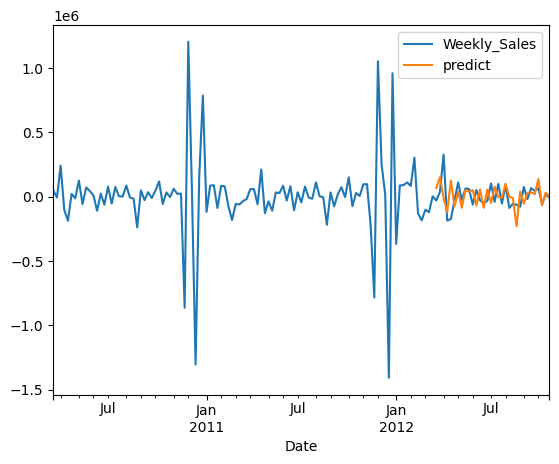

In [175]:
rolling_mean_detrended10_diff[['Weekly_Sales','predict']].plot()

<Axes: xlabel='Date'>

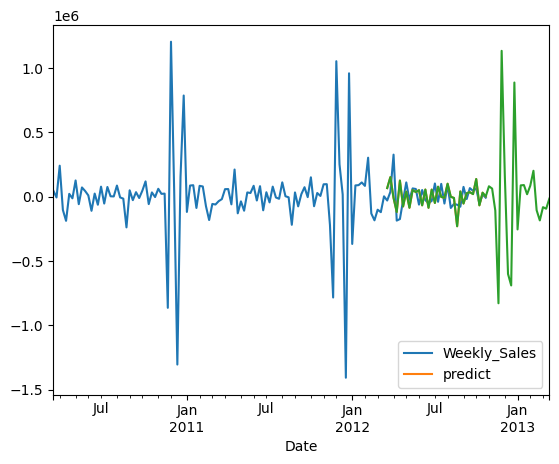

In [176]:
forecast10 = model10.forecast(steps=52)
rolling_mean_detrended10_diff.plot()
forecast10.plot()